<a href="https://colab.research.google.com/github/Al-ameen007/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data and some preprocessing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow 
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Normalizing the data and one-hot encoding the labels
from tensorflow.keras.utils import to_categorical
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Splitting the data into training and validation sets as we want to save the test set for the evaluation of the best model
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [5]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [6]:
saved_models = []
histories = []

# Base Model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64, (5, 5), strides=(2, 2),activation='relu', kernel_initializer='truncated_normal', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
opt = optimizers.SGD(learning_rate=0.0001, momentum=0.9)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
opt_2 = optimizers.SGD(learning_rate=0.001, momentum=0.9)
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt_4 = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
opt_5 = optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.1,)

In [9]:
def evaluate_model(saved_models, X, y):
  best_model, best_model_idx = saved_models[0], 0
  best_accuracy= (best_model.evaluate(X, y, verbose=1))[1]
  for i in range(1, len(saved_models)):
    loss, acc = saved_models[i].evaluate(X, y, verbose=1)
    if acc > best_accuracy:
      best_model, best_model_idx , best_accuracy= saved_models[i], i, acc
  print('model: ' + str(best_model_idx + 1), 'accuracy: ' + str('%.2f'%(best_accuracy * 100) + ' %'))
  return best_model, best_model_idx

In [10]:
def summaries(saved_models):
  for i in range(0, len(saved_models)):
    print('model: ' + str(i + 1))
    saved_models[i].summary()

# Trying differnt number of epochs

In [11]:
model_1 = keras.models.clone_model(model)
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_1_history = model_1.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_1)
histories.append(model_1_history)

Epoch 1/10
1594/1594 [==============================] - 10s 5ms/step - loss: 2.1314 - accuracy: 0.4138 - val_loss: 1.8247 - val_accuracy: 0.6716
Epoch 2/10
1594/1594 [==============================] - 10s 6ms/step - loss: 1.3077 - accuracy: 0.7370 - val_loss: 0.8850 - val_accuracy: 0.7961
Epoch 3/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.6993 - accuracy: 0.8255 - val_loss: 0.5736 - val_accuracy: 0.8510
Epoch 4/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.5114 - accuracy: 0.8624 - val_loss: 0.4612 - val_accuracy: 0.8751
Epoch 5/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4318 - accuracy: 0.8793 - val_loss: 0.4025 - val_accuracy: 0.8856
Epoch 6/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3870 - accuracy: 0.8891 - val_loss: 0.3660 - val_accuracy: 0.8958
Epoch 7/10
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3569 - accuracy: 0.8975 - val_loss: 0.3398 - val_accurac

In [12]:
model_2 = keras.models.clone_model(model)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_2_history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_2)
histories.append(model_2_history)

Epoch 1/15
1594/1594 [==============================] - 8s 5ms/step - loss: 2.0256 - accuracy: 0.4934 - val_loss: 1.6045 - val_accuracy: 0.6970
Epoch 2/15
1594/1594 [==============================] - 10s 6ms/step - loss: 1.0736 - accuracy: 0.7930 - val_loss: 0.7248 - val_accuracy: 0.8326
Epoch 3/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.5953 - accuracy: 0.8544 - val_loss: 0.5121 - val_accuracy: 0.8660
Epoch 4/15
1594/1594 [==============================] - 9s 6ms/step - loss: 0.4646 - accuracy: 0.8758 - val_loss: 0.4275 - val_accuracy: 0.8799
Epoch 5/15
1594/1594 [==============================] - 9s 5ms/step - loss: 0.4053 - accuracy: 0.8872 - val_loss: 0.3822 - val_accuracy: 0.8899
Epoch 6/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3700 - accuracy: 0.8940 - val_loss: 0.3536 - val_accuracy: 0.8992
Epoch 7/15
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3453 - accuracy: 0.9013 - val_loss: 0.3309 - val_accuracy

In [13]:
model_3 = keras.models.clone_model(model)
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model_3_history = model_3.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_3)
histories.append(model_3_history)

Epoch 1/20
1594/1594 [==============================] - 10s 6ms/step - loss: 2.1320 - accuracy: 0.3622 - val_loss: 1.8361 - val_accuracy: 0.6187
Epoch 2/20
1594/1594 [==============================] - 9s 5ms/step - loss: 1.3153 - accuracy: 0.7428 - val_loss: 0.8773 - val_accuracy: 0.8066
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.6767 - accuracy: 0.8388 - val_loss: 0.5496 - val_accuracy: 0.8630
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4880 - accuracy: 0.8721 - val_loss: 0.4388 - val_accuracy: 0.8846
Epoch 5/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.4123 - accuracy: 0.8874 - val_loss: 0.3857 - val_accuracy: 0.8954
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3708 - accuracy: 0.8967 - val_loss: 0.3517 - val_accuracy: 0.9011
Epoch 7/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.3429 - accuracy: 0.9034 - val_loss: 0.3285 - val_accuracy

In [14]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1915 - accuracy: 0.9464
model: 3 accuracy: 94.64 %


In [15]:
model_4 = keras.models.clone_model(best_model)
opt_1 = optimizers.SGD(learning_rate=0.05, momentum=0.9)
model_4.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])
model_4_history = model_4.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_4)
histories.append(model_4_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1611 - accuracy: 0.9499 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 2/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.0602 - val_accuracy: 0.9819
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0636 - val_accuracy: 0.9816
Epoch 4/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0948 - val_accuracy: 0.9781
Epoch 5/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0565 - val_accuracy: 0.9852
Epoch 6/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0850 - val_accuracy: 0.9817
Epoch 7/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0621 - val_accuracy:

In [16]:
model_5 = keras.models.clone_model(best_model)
model_5.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])
model_5_history = model_5.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_5)
histories.append(model_5_history)

Epoch 1/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.6835 - accuracy: 0.8201 - val_loss: 0.2945 - val_accuracy: 0.9124
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.2544 - accuracy: 0.9258 - val_loss: 0.2096 - val_accuracy: 0.9410
Epoch 3/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1830 - accuracy: 0.9473 - val_loss: 0.1572 - val_accuracy: 0.9543
Epoch 4/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1426 - accuracy: 0.9587 - val_loss: 0.1254 - val_accuracy: 0.9648
Epoch 5/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.1166 - accuracy: 0.9665 - val_loss: 0.1122 - val_accuracy: 0.9679
Epoch 6/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.1005 - accuracy: 0.9709 - val_loss: 0.0988 - val_accuracy: 0.9730
Epoch 7/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9749 - val_loss: 0.0821 - val_accuracy:

In [17]:
model_6 = keras.models.clone_model(best_model)
model_6.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_6_history = model_6.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_6)
histories.append(model_6_history)

Epoch 1/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.2418 - accuracy: 0.9258 - val_loss: 0.0880 - val_accuracy: 0.9750
Epoch 2/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.0628 - val_accuracy: 0.9814
Epoch 3/20
1594/1594 [==============================] - 9s 6ms/step - loss: 0.0503 - accuracy: 0.9849 - val_loss: 0.0571 - val_accuracy: 0.9830
Epoch 4/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0503 - val_accuracy: 0.9847
Epoch 5/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0402 - val_accuracy: 0.9891
Epoch 6/20
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0400 - val_accuracy: 0.9889
Epoch 7/20
1594/1594 [==============================] - 9s 5ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0418 - val_accuracy:

In [18]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0414 - accuracy: 0.9902
model: 6 accuracy: 99.02 %


# Trying different architectures

In [19]:
model_7 = models.Sequential()
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_7.add(layers.Dense(10, activation='softmax'))

In [20]:
model_7.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_7_history = model_7.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_7)
histories.append(model_7_history)

Epoch 1/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1854 - accuracy: 0.9411 - val_loss: 0.0796 - val_accuracy: 0.9773
Epoch 2/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0471 - val_accuracy: 0.9872
Epoch 3/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0431 - val_accuracy: 0.9871
Epoch 4/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0402 - val_accuracy: 0.9889
Epoch 5/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 6/20
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 7/20
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0565 -

In [21]:
model_8 = models.Sequential()
model_8.add(layers.Conv2D(16, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Conv2D(32, (3, 3), strides = (2, 2),activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_8.add(layers.Dense(10, activation='softmax'))

In [22]:
model_8.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_8_history = model_8.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_8)
histories.append(model_8_history)

Epoch 1/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.4185 - accuracy: 0.8664 - val_loss: 0.2485 - val_accuracy: 0.9246
Epoch 2/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1789 - accuracy: 0.9443 - val_loss: 0.1633 - val_accuracy: 0.9477
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1384 - accuracy: 0.9574 - val_loss: 0.1646 - val_accuracy: 0.9516
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.1313 - val_accuracy: 0.9598
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1057 - accuracy: 0.9674 - val_loss: 0.1494 - val_accuracy: 0.9541
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0958 - accuracy: 0.9702 - val_loss: 0.1306 - val_accuracy: 0.9619
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0907 - accuracy: 0.9705 - val_loss: 0.1076 - val_accuracy:

In [23]:
model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_9.add(layers.Dense(10, activation='softmax'))

In [24]:
model_9.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_9_history = model_9.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_9)
histories.append(model_9_history)

Epoch 1/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.1639 - accuracy: 0.9476 - val_loss: 0.0640 - val_accuracy: 0.9813
Epoch 2/20
1594/1594 [==============================] - 26s 16ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0580 - val_accuracy: 0.9829
Epoch 3/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 4/20
1594/1594 [==============================] - 25s 16ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0445 - val_accuracy: 0.9879
Epoch 5/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 6/20
1594/1594 [==============================] - 27s 17ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 7/20
1594/1594 [==============================] - 24s 15ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0390 -

In [25]:
model_10 = models.Sequential()
model_10.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_10.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_10.add(layers.Dense(10, activation='softmax'))

In [26]:
model_10.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_10_history = model_10.fit(X_train, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_10)
histories.append(model_10_history)

Epoch 1/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.2286 - accuracy: 0.9293 - val_loss: 0.0931 - val_accuracy: 0.9716
Epoch 2/20
1594/1594 [==============================] - 37s 23ms/step - loss: 0.0761 - accuracy: 0.9774 - val_loss: 0.0691 - val_accuracy: 0.9791
Epoch 3/20
1594/1594 [==============================] - 37s 23ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 4/20
1594/1594 [==============================] - 37s 24ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0624 - val_accuracy: 0.9822
Epoch 5/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.0285 - accuracy: 0.9907 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 6/20
1594/1594 [==============================] - 38s 24ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0637 - val_accuracy: 0.9828
Epoch 7/20
1594/1594 [==============================] - 37s 23ms/step - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0582 -

In [27]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0565 - accuracy: 0.9861
model: 9 accuracy: 99.21 %


#Trying different batch sizes

In [28]:
model_11 = keras.models.clone_model(best_model)
model_11.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_11_history = model_11.fit(X_train, y_train, epochs=20, batch_size=16, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_11)
histories.append(model_11_history)

Epoch 1/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.1456 - accuracy: 0.9548 - val_loss: 0.0603 - val_accuracy: 0.9814
Epoch 2/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0505 - val_accuracy: 0.9856
Epoch 3/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 4/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0569 - val_accuracy: 0.9834
Epoch 5/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 6/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0459 - val_accuracy: 0.9874
Epoch 7/20
3188/3188 [==============================] - 28s 9ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0440 - val_ac

In [29]:
model_12 = keras.models.clone_model(best_model)
model_12.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_12_history = model_12.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_12)
histories.append(model_12_history)

Epoch 1/20
797/797 [==============================] - 21s 26ms/step - loss: 0.2312 - accuracy: 0.9260 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 2/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0718 - accuracy: 0.9778 - val_loss: 0.0647 - val_accuracy: 0.9813
Epoch 3/20
797/797 [==============================] - 22s 27ms/step - loss: 0.0524 - accuracy: 0.9838 - val_loss: 0.0626 - val_accuracy: 0.9797
Epoch 4/20
797/797 [==============================] - 22s 28ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0451 - val_accuracy: 0.9870
Epoch 5/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0429 - val_accuracy: 0.9874
Epoch 6/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0453 - val_accuracy: 0.9866
Epoch 7/20
797/797 [==============================] - 21s 26ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0451 - val_accuracy:

In [30]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9905
model: 9 accuracy: 99.21 %


# Trying different activation functions

In [31]:
model_13 = models.Sequential()
model_13.add(layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal(), input_shape=(28, 28, 1)))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_13.add(layers.Flatten())
model_13.add(layers.Dense(64, activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(32, activation='sigmoid', kernel_initializer=tensorflow.keras.initializers.GlorotNormal()))
model_13.add(layers.Dense(10, activation='softmax'))

In [32]:
model_13.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_13_history = model_13.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_13)
histories.append(model_13_history)

Epoch 1/10
1594/1594 [==============================] - 20s 12ms/step - loss: 2.3080 - accuracy: 0.1058 - val_loss: 2.3036 - val_accuracy: 0.1070
Epoch 2/10
1594/1594 [==============================] - 20s 12ms/step - loss: 2.3036 - accuracy: 0.1086 - val_loss: 2.3020 - val_accuracy: 0.1101
Epoch 3/10
1594/1594 [==============================] - 20s 12ms/step - loss: 2.3005 - accuracy: 0.1138 - val_loss: 2.2964 - val_accuracy: 0.1122
Epoch 4/10
1594/1594 [==============================] - 19s 12ms/step - loss: 1.8831 - accuracy: 0.3407 - val_loss: 0.9687 - val_accuracy: 0.6964
Epoch 5/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.5969 - accuracy: 0.8240 - val_loss: 0.3709 - val_accuracy: 0.8940
Epoch 6/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.2893 - accuracy: 0.9170 - val_loss: 0.2065 - val_accuracy: 0.9440
Epoch 7/10
1594/1594 [==============================] - 19s 12ms/step - loss: 0.1844 - accuracy: 0.9456 - val_loss: 0.1554 -

In [33]:
model_14 = models.Sequential()
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal(), input_shape=(28, 28, 1)))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Conv2D(32, (3, 3), activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_14.add(layers.Flatten())
model_14.add(layers.Dense(64, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(32, activation='selu', kernel_initializer= tensorflow.keras.initializers.LecunNormal()))
model_14.add(layers.Dense(10, activation='softmax'))

In [34]:
model_14.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_14_history = model_14.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_14)
histories.append(model_14_history)

Epoch 1/10
1594/1594 [==============================] - 22s 13ms/step - loss: 0.1444 - accuracy: 0.9551 - val_loss: 0.0809 - val_accuracy: 0.9748
Epoch 2/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0471 - val_accuracy: 0.9863
Epoch 3/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0382 - accuracy: 0.9875 - val_loss: 0.0452 - val_accuracy: 0.9867
Epoch 4/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0457 - val_accuracy: 0.9884
Epoch 5/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.0614 - val_accuracy: 0.9839
Epoch 6/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0464 - val_accuracy: 0.9899
Epoch 7/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0550 -

In [35]:
from keras.layers import LeakyReLU
model_15 = models.Sequential()
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_15.add(layers.Flatten())
model_15.add(layers.Dense(64, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(32, kernel_initializer='he_uniform'))
model_15.add(LeakyReLU(alpha=0.05))
model_15.add(layers.Dense(10, activation='softmax'))

In [36]:
model_15.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_15_history = model_15.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_15)
histories.append(model_15_history)

Epoch 1/10
1594/1594 [==============================] - 21s 13ms/step - loss: 0.1669 - accuracy: 0.9471 - val_loss: 0.0730 - val_accuracy: 0.9790
Epoch 2/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0533 - val_accuracy: 0.9841
Epoch 3/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0606 - val_accuracy: 0.9822
Epoch 4/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0404 - val_accuracy: 0.9889
Epoch 5/10
1594/1594 [==============================] - 20s 13ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.0451 - val_accuracy: 0.9873
Epoch 6/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0407 - val_accuracy: 0.9901
Epoch 7/10
1594/1594 [==============================] - 20s 12ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0461 -

In [37]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0492 - accuracy: 0.9862
model: 9 accuracy: 99.21 %


# Trying different optimizers

In [38]:
model_16 = keras.models.clone_model(best_model)
model_16.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])
model_16_history = model_16.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_16)
histories.append(model_16_history)

Epoch 1/10
1594/1594 [==============================] - 24s 15ms/step - loss: 0.2367 - accuracy: 0.9268 - val_loss: 0.0848 - val_accuracy: 0.9756
Epoch 2/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.1042 - accuracy: 0.9692 - val_loss: 0.0875 - val_accuracy: 0.9772
Epoch 3/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0905 - accuracy: 0.9741 - val_loss: 0.0993 - val_accuracy: 0.9718
Epoch 4/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0827 - accuracy: 0.9774 - val_loss: 0.0750 - val_accuracy: 0.9788
Epoch 5/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0808 - accuracy: 0.9774 - val_loss: 0.1030 - val_accuracy: 0.9762
Epoch 6/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0761 - accuracy: 0.9790 - val_loss: 0.0866 - val_accuracy: 0.9778
Epoch 7/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.0745 - accuracy: 0.9793 - val_loss: 0.1036 -

In [39]:
model_17 = keras.models.clone_model(best_model)
model_17.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])
model_17_history = model_17.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_17)
histories.append(model_17_history)

Epoch 1/10
1594/1594 [==============================] - 23s 14ms/step - loss: 0.2101 - accuracy: 0.9435 - val_loss: 0.1315 - val_accuracy: 0.9640
Epoch 2/10
1594/1594 [==============================] - 26s 16ms/step - loss: 0.1130 - accuracy: 0.9716 - val_loss: 0.0877 - val_accuracy: 0.9759
Epoch 3/10
1594/1594 [==============================] - 35s 22ms/step - loss: 0.1127 - accuracy: 0.9744 - val_loss: 0.1223 - val_accuracy: 0.9749
Epoch 4/10
1594/1594 [==============================] - 33s 20ms/step - loss: 0.1114 - accuracy: 0.9757 - val_loss: 0.1116 - val_accuracy: 0.9713
Epoch 5/10
1594/1594 [==============================] - 26s 16ms/step - loss: 0.1085 - accuracy: 0.9767 - val_loss: 0.1145 - val_accuracy: 0.9806
Epoch 6/10
1594/1594 [==============================] - 38s 24ms/step - loss: 0.1189 - accuracy: 0.9763 - val_loss: 0.1381 - val_accuracy: 0.9712
Epoch 7/10
1594/1594 [==============================] - 39s 24ms/step - loss: 0.1219 - accuracy: 0.9769 - val_loss: 0.2226 -

In [40]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.1317 - accuracy: 0.9752
model: 9 accuracy: 99.21 %


# Trying different dropout rates

In [41]:
from keras.layers import Dropout

In [42]:
model_18 = models.Sequential()
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.4))
model_18.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_18.add(layers.Flatten())
model_18.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_18.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.4))
model_18.add(layers.Dense(10, activation='softmax'))

In [43]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_18.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_18_history = model_18.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_18)
histories.append(model_18_history)

Epoch 1/10
1594/1594 [==============================] - 33s 20ms/step - loss: 0.1825 - accuracy: 0.9413 - val_loss: 0.0612 - val_accuracy: 0.9802
Epoch 2/10
1594/1594 [==============================] - 32s 20ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0475 - val_accuracy: 0.9861
Epoch 3/10
1594/1594 [==============================] - 31s 20ms/step - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0478 - val_accuracy: 0.9869
Epoch 4/10
1594/1594 [==============================] - 31s 19ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 5/10
1594/1594 [==============================] - 30s 19ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0383 - val_accuracy: 0.9894
Epoch 6/10
1594/1594 [==============================] - 30s 19ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0462 - val_accuracy: 0.9884
Epoch 7/10
1594/1594 [==============================] - 30s 19ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0434 -

In [44]:
model_19 = models.Sequential()
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_19.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_19.add(Dropout(0.4))
model_19.add(layers.Flatten())
model_19.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_19.add(Dropout(0.4))
model_19.add(layers.Dense(10, activation='softmax'))

In [45]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_19.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_19_history = model_19.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_19)
histories.append(model_19_history)

Epoch 1/10
1594/1594 [==============================] - 32s 19ms/step - loss: 0.7106 - accuracy: 0.7762 - val_loss: 0.1127 - val_accuracy: 0.9716
Epoch 2/10
1594/1594 [==============================] - 31s 19ms/step - loss: 0.3142 - accuracy: 0.9148 - val_loss: 0.0846 - val_accuracy: 0.9772
Epoch 3/10
1594/1594 [==============================] - 31s 19ms/step - loss: 0.2516 - accuracy: 0.9333 - val_loss: 0.0856 - val_accuracy: 0.9784
Epoch 4/10
1594/1594 [==============================] - 31s 20ms/step - loss: 0.2237 - accuracy: 0.9429 - val_loss: 0.0631 - val_accuracy: 0.9829
Epoch 5/10
1594/1594 [==============================] - 31s 20ms/step - loss: 0.1968 - accuracy: 0.9482 - val_loss: 0.0598 - val_accuracy: 0.9846
Epoch 6/10
1594/1594 [==============================] - 31s 19ms/step - loss: 0.1807 - accuracy: 0.9530 - val_loss: 0.0600 - val_accuracy: 0.9851
Epoch 7/10
1594/1594 [==============================] - 31s 20ms/step - loss: 0.1651 - accuracy: 0.9555 - val_loss: 0.0536 -

In [46]:
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(Dropout(0.75))
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_20.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_20.add(Dropout(0.75))
model_20.add(layers.Dense(10, activation='softmax'))

In [47]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_20.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_20_history = model_20.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_20)
histories.append(model_20_history)

Epoch 1/10
1594/1594 [==============================] - 35s 22ms/step - loss: 2.3083 - accuracy: 0.1099 - val_loss: 2.3021 - val_accuracy: 0.1101
Epoch 2/10
1594/1594 [==============================] - 32s 20ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3017 - val_accuracy: 0.1101
Epoch 3/10
1594/1594 [==============================] - 34s 21ms/step - loss: 2.3020 - accuracy: 0.1122 - val_loss: 2.3019 - val_accuracy: 0.1101
Epoch 4/10
1594/1594 [==============================] - 34s 21ms/step - loss: 2.3018 - accuracy: 0.1120 - val_loss: 2.3036 - val_accuracy: 0.1101
Epoch 5/10
1594/1594 [==============================] - 34s 21ms/step - loss: 2.3020 - accuracy: 0.1108 - val_loss: 2.3021 - val_accuracy: 0.1101
Epoch 6/10
1594/1594 [==============================] - 35s 22ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1101
Epoch 7/10
1594/1594 [==============================] - 33s 21ms/step - loss: 2.3018 - accuracy: 0.1114 - val_loss: 2.3020 -

In [48]:
model_21 = models.Sequential()
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_21.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_21.add(Dropout(0.75))
model_21.add(layers.Flatten())
model_21.add(layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_21.add(Dropout(0.75))
model_21.add(layers.Dense(10, activation='softmax'))

In [49]:
opt_3 = optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_21.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])
model_21_history = model_21.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True,validation_data=(X_val, y_val), verbose=1)
saved_models.append(model_21)
histories.append(model_21_history)

Epoch 1/10
1594/1594 [==============================] - 32s 19ms/step - loss: 2.2660 - accuracy: 0.1560 - val_loss: 2.1480 - val_accuracy: 0.2104
Epoch 2/10
1594/1594 [==============================] - 31s 19ms/step - loss: 2.1103 - accuracy: 0.2335 - val_loss: 1.8052 - val_accuracy: 0.4060
Epoch 3/10
1594/1594 [==============================] - 32s 20ms/step - loss: 1.9159 - accuracy: 0.3112 - val_loss: 1.3479 - val_accuracy: 0.5923
Epoch 4/10
1594/1594 [==============================] - 31s 20ms/step - loss: 1.7474 - accuracy: 0.3742 - val_loss: 1.2676 - val_accuracy: 0.5572
Epoch 5/10
1594/1594 [==============================] - 31s 20ms/step - loss: 1.6839 - accuracy: 0.4070 - val_loss: 1.0103 - val_accuracy: 0.6494
Epoch 6/10
1594/1594 [==============================] - 30s 19ms/step - loss: 1.6188 - accuracy: 0.4267 - val_loss: 1.0479 - val_accuracy: 0.6204
Epoch 7/10
1594/1594 [==============================] - 31s 19ms/step - loss: 1.5735 - accuracy: 0.4466 - val_loss: 0.9275 -

In [50]:
best_model, best_model_idx = evaluate_model(saved_models, X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7521 - accuracy: 0.7579
model: 9 accuracy: 99.21 %


# Models Summary

In [51]:
summaries(saved_models)

model: 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                147520    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 149,834
Trainable params: 149,834
Non-trainable params: 0
_________________________________________

 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
_________________________________________________________________
model: 8
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                     

                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                51264     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
_________________________________________________________________
model: 14
Model: "sequential_6"
________________________________________

                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                51264     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 63,242
Trainable params: 63,242
Non-trainable params: 0
______

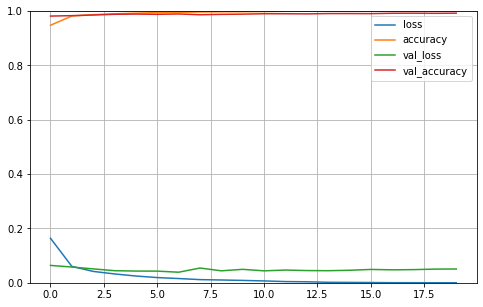

In [52]:
import pandas as pd

pd.DataFrame(histories[best_model_idx].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Summary of our best model, model 9 <br>
number of epochs is 20 <br>
size of batch is 32 <br>
stochastic SGD with a learning rate of 0.1 and a momentum of 0.9 <br>
we used ReLU as our activation fucntion in all the layers except for the outplut layer wher we used a softmax activation function <br>
our architecture is as follow: <br>
our first conc layer was 32 filters of size 3x3 followed by a max pool layer <br>
the second conv layer is 32 filters of size 5x5 also followed by a max pool layer <br>
we chose 1 FC layer consisting of 32 neurons followed by an output layer.

